In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)


In [3]:
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
import matplotlib.colors as clr
cmap = clr.LinearSegmentedColormap.from_list('custom_map', [ '#ae0c1b', 'white', '#015697'], N=256)
cmap_wb = clr.LinearSegmentedColormap.from_list('custom_map', [ 'aliceblue', '#015697'], N=256)
cmap_rb = clr.LinearSegmentedColormap.from_list('custom_map', [ '#ae0c1b', '#015697'], N=256)
cmap_bg = clr.LinearSegmentedColormap.from_list('custom_map', [ 'black', 'gainsboro'], N=256)
colors=['#ae0c1b', '#015697']

In [5]:
def sample_genre_rows(df, feature='genre', n=3):
    return df.groupby(feature).apply(lambda x: x.sample(n)).reset_index(drop=True)

In [6]:
df_with = pd.read_csv('reduced_merged.csv')
#df_entire = pd.read_csv('merged.csv')
df = pd.read_csv('reduced_merged_without_outliers.csv')

### Data prep

In [7]:
df

track_number  album_type  album_total_tracks  danceability  energy  \
0                 1           2                   1         0.910   0.374   
1                10           0                 100         0.269   0.516   
2                 7           0                  16         0.495   0.891   
3                41           1                 106         0.409   0.350   
4                22           0                  23         0.609   0.947   
...             ...         ...                 ...           ...     ...   
87265             1           2                   1         0.693   0.896   
87266            10           0                  24         0.712   0.976   
87267            22           1                  31         0.759   0.843   
87268             9           0                  10         0.529   0.704   
87269             1           0                   7         0.766   0.382   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
0        -9.844       0.1990      0.075700           0.00301     0.154   
1        -7.361       0.0366      0.406000           0.00000     0.117   
2        -4.266       0.0383      0.000186           0.00000     0.475   
3        -8.025       0.0275      0.750000           0.00000     0.114   
4        -5.823       0.2340      0.038900           0.00000     0.956   
...         ...          ...           ...               ...       ...   
87265    -4.114       0.0682      0.310000           0.00000     0.195   
87266    -7.570       0.0964      0.005040           0.95700     0.225   
87267    -3.718       0.0913      0.127000           0.00000     0.114   
87268    -2.691       0.0411      0.004860           0.00000     0.646   
87269   -11.464       0.0324      0.698000           0.00143     0.157   

       valence    tempo  tempo_confidence  mode_confidence  num_genres_track  \
0        0.432  104.042             0.578            0.583                 1   
1        0.341  178.174             0.030            0.717                 1   
2        0.735  155.075             0.233            0.452                 1   
3        0.126  139.876             0.250            0.693                 1   
4        0.177  105.012             0.803            0.124                 1   
...        ...      ...               ...              ...               ...   
87265    0.854  126.995             0.883            0.894                 1   
87266    0.101  121.988             0.822            0.447                 1   
87267    0.560  105.016             0.659            0.676                 4   
87268    0.267  124.228             0.492            0.482                 1   
87269    0.672  119.992             0.736            0.547                 1   

       genre  duration_min  album_release_year  num_artists  popularity_art  \
0         39      2.678750                2022            1       45.000000   
1         17      5.382217                2021            1       67.000000   
2         17      2.988000                2012            1       67.000000   
3         17      5.113100                2014            1       67.000000   
4         17      2.577100                2011            1       67.000000   
...      ...           ...                 ...          ...             ...   
87265     55      5.031483                2017            3       71.333333   
87266     13     11.032533                2017            2       18.500000   
87267     68      4.394433                2022            2       84.000000   
87268    110      3.109783                2017            2       54.500000   
87269     81      5.419267                2014            2       63.500000   

          followers  num_genres_art  popularity_track  
0      1.682600e+04        0.000000              35.0  
1      1.517867e+06        2.000000              49.0  
2      1.517867e+06        2.000000              48.0  
3      1.517867e+06        2.000000              35.0  
4  

In [111]:
x = df.drop(['popularity_track'],axis=1)
y = df['popularity_track'].apply(lambda x: 0 if x<30 else 1)

In [9]:
x_w = df_with.drop(['popularity_track'],axis=1)
y_w = df_with['popularity_track'].apply(lambda x: 0 if x<30 else 1)

In [10]:
x_reg = df.drop(['popularity_track'],axis=1)
y_reg = df['popularity_track']

In [97]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [12]:
X_train_w,X_test_w, y_train_w,y_test_w = train_test_split(x_w,y_w,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train_w = scl.fit_transform(X_train_w)
X_test_w = scl.transform(X_test_w)

X_train_e,X_test_e, y_train_e,y_test_e = train_test_split(x_e,y_e,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train_e = scl.fit_transform(X_train_e)
X_test_e = scl.transform(X_test_e)

In [13]:
X_train_reg,X_test_reg, y_train_reg,y_test_reg = train_test_split(x_reg,y_reg,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train_reg = scl.fit_transform(X_train_reg)
X_test_reg = scl.transform(X_test_reg)

In [14]:
x['popularity_track'] = y

In [15]:
sampled = sample_genre_rows(x, 'popularity_track', n=3000)

In [16]:
y_s = sampled['popularity_track']
x_s = sampled.drop(['popularity_track'],axis=1)

In [17]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_s,y_s,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train_s = scl.fit_transform(X_train_s)
X_test_s = scl.transform(X_test_s)

In [18]:
x_reg['popularity_track'] = y_reg

In [19]:
sampled_reg = x_reg.sample(n=6000, replace=False)
sampled_reg

track_number  album_type  album_total_tracks  danceability  energy  \
80638             1           2                   1         0.773   0.654   
71943            13           0                  14         0.517   0.699   
49412            11           0                  36         0.782   0.881   
74585            14           1                  14         0.713   0.952   
66652             1           2                   1         0.404   0.913   
...             ...         ...                 ...           ...     ...   
41903            11           0                  15         0.683   0.713   
50147             1           2                   2         0.809   0.867   
72175             5           0                   9         0.656   0.918   
68075             1           0                  26         0.403   0.826   
21456             5           0                  12         0.391   0.951   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
80638    -7.796       0.2840       0.53000          0.000000    0.1090   
71943    -4.174       0.0550       0.00269          0.258000    0.0763   
49412    -6.870       0.0610       0.15300          0.000000    0.1310   
74585    -2.959       0.1080       0.02030          0.000003    0.1170   
66652    -2.215       0.1290       0.27800          0.000000    0.0978   
...         ...          ...           ...               ...       ...   
41903    -6.633       0.1010       0.13900          0.000000    0.1070   
50147    -9.194       0.0492       0.00435          0.852000    0.0562   
72175    -9.747       0.0352       0.30800          0.010300    0.0817   
68075    -5.010       0.0721       0.49300          0.000000    0.1390   
21456    -7.419       0.0692       0.01260          0.000378    0.0878   

       valence    tempo  tempo_confidence  mode_confidence  num_genres_track  \
80638    0.607  128.989             0.751            0.536                 1   
71943    0.222  173.994             0.392            0.642                 1   
49412    0.825  110.885             0.659            0.657                 1   
74585    0.571  105.981             0.579            0.577                 1   
66652    0.160   94.989             0.052            0.572                 1   
...        ...      ...               ...              ...               ...   
41903    0.939  178.060             0.412            0.545                 1   
50147    0.657  121.997             0.865            0.230                 1   
72175    0.782  103.225             0.908            0.699                 1   
68075    0.358   73.226             0.656            0.591                 1   
21456    0.468  157.660             0.774            0.487                 2   

       genre  duration_min  album_release_year  num_artists  popularity_art  \
80638    106      3.031417                2017            2       58.000000   
71943     27      4.243783                2016            2       36.500000   
49412     18      3.250217                1981            1       35.000000   
74585     89      3.250667                2017            3       81.000000   
66652     46      3.332450                2020            3       48.333333   
...      ...           ...                 ...          ...             ...   
41903     10      3.750667                2007            1       37.000000   
50147    109      3.788200                2022            1       34.000000   
72175     65      6.014883                1994            2       77.500000   
68075     65      5.062500                2014            2       65.500000   
21456     86      2.472667                1999            1       75.000000   

          followers  num_genres_art  popularity_track  
80638  2.341140e+05        1.000000              57.0  
71943  4.216600e+04        2.000000              20.0  
49412  2.514800e+04        1.000000              26.0  
74585  2.635553e+07        3.000000              41.0  
666

In [20]:
y_reg_s = sampled_reg['popularity_track']
x_reg_s = sampled_reg.drop(['popularity_track', 'album_type','genre' ],axis=1)

X_train_reg_s, X_test_reg_s, y_train_reg_s, y_test_reg_s = train_test_split(x_reg_s,y_reg_s,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train_reg_s = scl.fit_transform(X_train_reg_s)
X_test_reg_s = scl.transform(X_test_reg_s)

## PCA

In [54]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_pca1 = pca.transform(X_train)

PCA(n_components=1)

In [55]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

PCA(n_components=2)

<Figure size 1000x800 with 0 Axes>

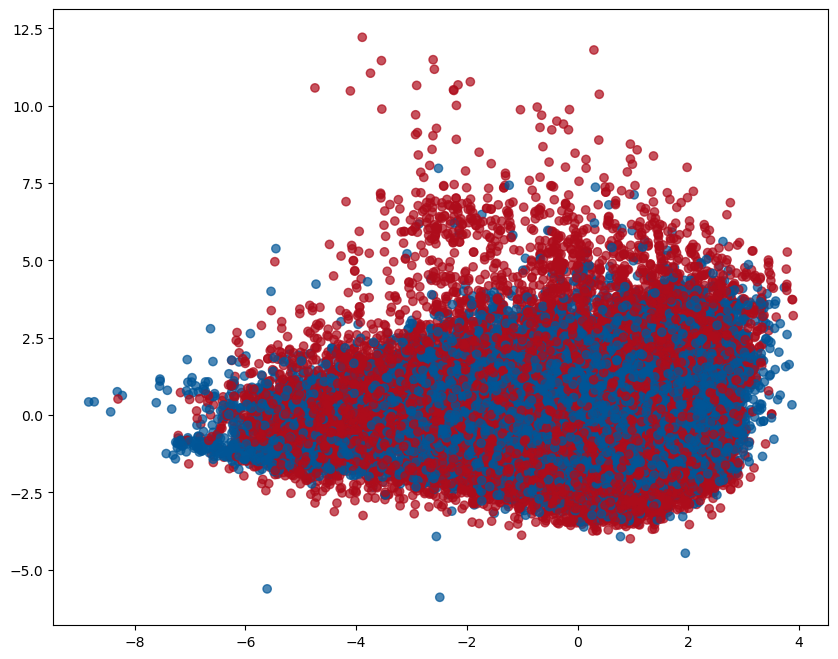

In [97]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=cmap, alpha=0.7)
plt.show()

In [71]:
len(X_pca_s)

61089

PCA(n_components=2)

<Figure size 800x600 with 0 Axes>

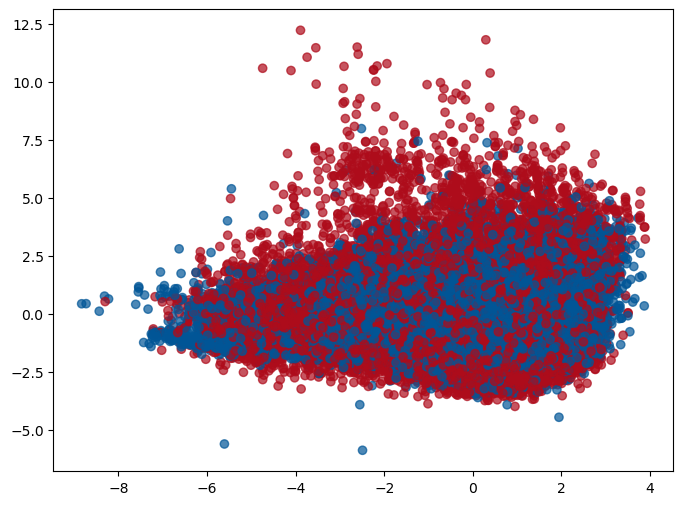

In [75]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca_s = pca.transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_s[:, 0], X_pca_s[:, 1], c=y_train, cmap=cmap,alpha=0.7)

plt.show()

### Logistic Regression

In [9]:
X_train

array([[ 1.45058204, -0.80583278,  0.5278012 , ...,  0.65565058,
        -0.14651615,  0.13685785],
       [ 0.96032305, -0.80583278,  0.12952132, ...,  0.65565058,
        -0.15532411,  0.13685785],
       [ 0.47006406, -0.80583278,  1.07543605, ..., -0.85847944,
        -0.30440201, -0.40712804],
       ...,
       [ 0.07785687, -0.80583278, -0.11940361, ..., -0.57808499,
        -0.30002746, -0.40712804],
       [-0.60850571,  1.52656173, -0.76660843, ..., -0.74632166,
        -0.30594271, -0.95111393],
       [-0.60850571,  1.52656173, -0.76660843, ..., -0.38180888,
        -0.30559806, -0.67912098]])

In [28]:
X_train.T[0].reshape(-1,1)

array([[ 1.45058204],
       [ 0.96032305],
       [ 0.47006406],
       ...,
       [ 0.07785687],
       [-0.60850571],
       [-0.60850571]])

In [31]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [32]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7362209235705283
F1-score [0.71111855 0.75730953]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     12527
           1       0.73      0.79      0.76     13654

    accuracy                           0.74     26181
   macro avg       0.74      0.73      0.73     26181
weighted avg       0.74      0.74      0.74     26181



In [48]:
# w/ outlier
clf = LogisticRegression(random_state=0)
clf.fit(X_train_w, y_train_w)

y_pred_w = clf.predict(X_test_w)

print('Accuracy %s' % accuracy_score(y_test_w, y_pred_w))
print('F1-score %s' % f1_score(y_test_w, y_pred_w, average=None))
print(classification_report(y_test_w, y_pred_w))

LogisticRegression(random_state=0)

Accuracy 0.7601527641231188
F1-score [0.74155564 0.77625313]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     12790
           1       0.75      0.81      0.78     13656

    accuracy                           0.76     26446
   macro avg       0.76      0.76      0.76     26446
weighted avg       0.76      0.76      0.76     26446



#### grid-search

In [21]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    plot_roc
)


def eval(clf, X_test, y_train, y_test, X_train=X_train):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_test_pred))

    clf.score(X_test, y_test)

    print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
    print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
    print()

    print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
    print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

    print('---------------------------------------------------------------')
    print(classification_report(y_test, y_test_pred))
    
    
def plot_roc_cust(y_test, y_test_pred_proba):
    ax = plot_roc(y_test, y_test_pred_proba, figsize = (6,5),cmap=cmap_bg, plot_micro=False)
    
    for line in ax.lines:
        line.set_linewidth(1)
    
    macro = ax.lines[-2]
    macro.set_color(colors[1])
    macro.set_linewidth(6)
    
 #   micro = ax.lines[-3]
 #   micro.set_color('yellowgreen')
 #   micro.set_linewidth(6)
    
    legend = ax.get_legend()
    legend.legendHandles[-1].set_color(colors[1])
#    legend.legendHandles[-2].set_color('yellowgreen')

    plt.show()
    

In [68]:
%%time

# default: clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),

    'max_iter'  : [100,200, 400, 800, 1600, 3200]
}
]

random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
7300 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2500 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = 

Best parameters: {'penalty': 'l2', 'max_iter': 3200, 'C': 0.615848211066026}
CPU times: user 9.22 s, sys: 7.81 s, total: 17 s
Wall time: 1min 8s


In [30]:
%%time

# default: clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,40),
    'solver'  :  ["lbfgs", "liblinear", "newton-cholesky", "sag", "saga"]
}
]

random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_w, y_train_w)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6600 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10000.0}
CPU times: user 14.6 s, sys: 10.3 s, total: 24.9 s
Wall time: 3min 12s


In [31]:
clf

LogisticRegression(C=10000.0, solver='liblinear')

In [32]:
clf = LogisticRegression(random_state=0, C=10000.0, solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

LogisticRegression(C=10000.0, random_state=0, solver='liblinear')

Accuracy 0.7559298728085253
F1-score [0.7343698  0.77425281]
              precision    recall  f1-score   support

           0       0.77      0.71      0.73     12527
           1       0.75      0.80      0.77     13654

    accuracy                           0.76     26181
   macro avg       0.76      0.75      0.75     26181
weighted avg       0.76      0.76      0.76     26181



In [49]:
clf=LogisticRegression(random_state=0, C=10000.0, solver='liblinear')
clf.fit(X_train, y_train)
eval(clf, X_test, y_train, y_test)

LogisticRegression(C=10000.0, random_state=0, solver='liblinear')

Accuracy: 0.7559298728085253
Train Accuracy 0.7592201542012473
Train F1-score [0.73750335 0.77761819]

Test Accuracy 0.7559298728085253
Test F1-score [0.7343698  0.77425281]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.71      0.73     12527
           1       0.75      0.80      0.77     13654

    accuracy                           0.76     26181
   macro avg       0.76      0.75      0.75     26181
weighted avg       0.76      0.76      0.76     26181



<Figure size 600x350 with 0 Axes>

<AxesSubplot:>

Text(0.5, 9.222222222222216, 'Predicated')

Text(45.722222222222214, 0.5, 'True')

Text(0.5, 1.0, 'confusion matrix Logistic Regression w/ outliers')

([<matplotlib.axis.XTick at 0x7f8c0addd190>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

([<matplotlib.axis.YTick at 0x7f8c0bd47370>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

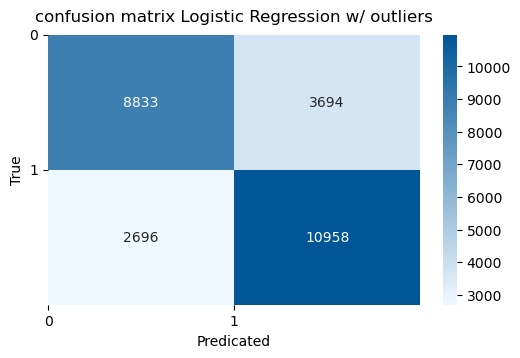

In [52]:
y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3.5))
sns.heatmap(cf, annot=True, cmap=cmap_wb, fmt='.0f')

plt.xlabel("Predicated")
plt.ylabel("True")
plt.title("confusion matrix Logistic Regression w/ outliers", pad=10)

plt.xticks(range(len(clf.classes_)), clf.classes_, rotation = 0)
plt.yticks(range(len(clf.classes_)), clf.classes_, rotation = 360)

plt.show()

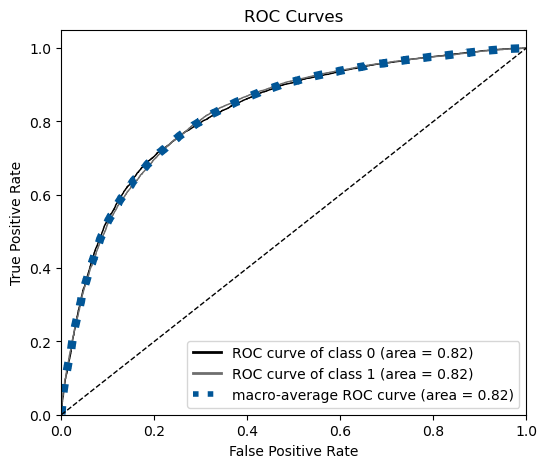

In [36]:

y_test_pred_proba = clf.predict_proba(X_test)
plot_roc_cust(y_test, y_test_pred_proba)

In [24]:
from scikitplot.metrics import plot_roc 

In [ ]:
y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3.5))
sns.heatmap(cf, annot=True, cmap=cmap_wb, fmt='.0f')

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("confusion matrix Logistic Regression", pad=10)

plt.xticks(range(len(clf.classes_)), clf.classes_, rotation = 0)
plt.yticks(range(len(clf.classes_)), clf.classes_, rotation = 360)

plt.show()

In [60]:
clf

LogisticRegression(C=1.623776739188721, max_iter=3200)

In [74]:
# w/ outliers
#Best parameters: {'penalty': 'l2', 'max_iter': 3200, 'C': 1.623776739188721}
clf = LogisticRegression(random_state=0, penalty= 'l2', C=1.623776739188721, max_iter=3200)
clf.fit(X_train_w, y_train_w)
y_pred = clf.predict(X_test_w)

print('Accuracy %s' % accuracy_score(y_test_w, y_pred_w))
print('F1-score %s' % f1_score(y_test_w, y_pred_w, average=None))
print(classification_report(y_test_w, y_pred_w))

LogisticRegression(C=1.623776739188721, max_iter=3200, random_state=0)

Accuracy 0.7601527641231188
F1-score [0.74155564 0.77625313]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     12790
           1       0.75      0.81      0.78     13656

    accuracy                           0.76     26446
   macro avg       0.76      0.76      0.76     26446
weighted avg       0.76      0.76      0.76     26446



In [25]:
clf = LogisticRegression(random_state=0, C=10000.0, solver='liblinear')
clf.fit(X_train_w, y_train_w)
y_pred_w = clf.predict(X_test_w)

print('Accuracy %s' % accuracy_score(y_test_w, y_pred_w))
print('F1-score %s' % f1_score(y_test_w, y_pred_w, average=None))
print(classification_report(y_test_w, y_pred_w))

LogisticRegression(C=10000.0, random_state=0, solver='liblinear')

Accuracy 0.7603418286319292
F1-score [0.74179092 0.77640584]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     12790
           1       0.75      0.81      0.78     13656

    accuracy                           0.76     26446
   macro avg       0.76      0.76      0.76     26446
weighted avg       0.76      0.76      0.76     26446



In [25]:
# Extract coefficients and intercept
coefficients = clf.coef_[0]


# Create a DataFrame for better readability
coef_df_w = pd.DataFrame({
    'Feature': x_w.columns,
    'Coefficient': coefficients
})

idx = coef_df_w['Coefficient'].abs().sort_values(ascending=False).index
coef_df_w.loc[idx]

Feature  Coefficient
2   album_total_tracks    -1.849825
0         track_number    -1.335672
19      popularity_art     1.297904
21      num_genres_art    -0.303688
1           album_type    -0.291011
20           followers    -0.210728
17  album_release_year    -0.168465
6          speechiness    -0.162889
15               genre     0.139040
8     instrumentalness    -0.132273
16        duration_min    -0.063122
3         danceability     0.055123
10             valence    -0.054698
18         num_artists     0.054127
13     mode_confidence     0.048418
9             liveness     0.043822
7         acousticness     0.040310
4               energy    -0.026324
12    tempo_confidence    -0.016721
5             loudness    -0.008912
14    num_genres_track     0.008142
11               tempo    -0.005642

In [43]:
cols = coef_df_w.Feature[coef_df_w.Coefficient.abs() > 0.1].values

In [44]:
reduced = df_with[cols ]
reduced['popularity_track'] = df_with['popularity_track']

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_25199/3748559011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced['popularity_track'] = df_with['popularity_track']


In [45]:
reduced

track_number  album_type  album_total_tracks  speechiness  \
0                 1           2                   1       0.1990   
1                10           0                 100       0.0366   
2                 7           0                  16       0.0383   
3                41           1                 106       0.0275   
4                22           0                  23       0.2340   
...             ...         ...                 ...          ...   
88147             1           2                   1       0.0682   
88148            10           0                  24       0.0964   
88149            22           1                  31       0.0913   
88150             9           0                  10       0.0411   
88151             1           0                   7       0.0324   

       instrumentalness  genre  album_release_year  popularity_art  \
0               0.00301     39                2022       45.000000   
1               0.00000     17                2021       67.000000   
2               0.00000     17                2012       67.000000   
3               0.00000     17                2014       67.000000   
4               0.00000     17                2011       67.000000   
...                 ...    ...                 ...             ...   
88147           0.00000     55                2017       71.333333   
88148           0.95700     13                2017       18.500000   
88149           0.00000     68                2022       84.000000   
88150           0.00000    110                2017       54.500000   
88151           0.00143     81                2014       63.500000   

          followers  num_genres_art  popularity_track  
0      1.682600e+04        0.000000              35.0  
1      1.517867e+06        2.000000              49.0  
2      1.517867e+06        2.000000              48.0  
3      1.517867e+06        2.000000              35.0  
4      1.517867e+06        2.000000              21.0  
...             ...             ...               ...  
88147  1.133798e+07        2.333333              48.0  
88148  1.615350e+04        3.000000              14.0  
88149  1.888165e+07        4.000000               0.0  
88150  2.831990e+05        3.500000              36.0  
88151  1.444316e+06        1.000000              64.0  

[88152 rows x 11 columns]

In [46]:
x_r = reduced.drop(columns=['popularity_track'])
y_r = reduced['popularity_track'].apply(lambda x: 0 if x<30 else 1)

X_train_r,X_test_r, y_train_r,y_test_r = train_test_split(x_r,y_r,test_size=0.3,random_state=2)

scl = StandardScaler()
X_train_r = scl.fit_transform(X_train_r)
X_test_r = scl.transform(X_test_r)

In [47]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_r, y_train_r)
y_pred_r = clf.predict(X_test_r)

print('Accuracy %s' % accuracy_score(y_test_r, y_pred_r))
print('F1-score %s' % f1_score(y_test_r, y_pred_r, average=None))
print(classification_report(y_test_r, y_pred_r))

LogisticRegression(random_state=0)

Accuracy 0.7579974287226802
F1-score [0.73886078 0.77452086]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     12790
           1       0.75      0.80      0.77     13656

    accuracy                           0.76     26446
   macro avg       0.76      0.76      0.76     26446
weighted avg       0.76      0.76      0.76     26446



In [48]:
%%time

# default: clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,40),
    'solver'  :  ["lbfgs", "liblinear", "newton-cholesky", "sag", "saga"]
}
]

random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_w, y_train_w)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6350 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
396 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
 

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 3888.155180308085}
CPU times: user 14.4 s, sys: 10.9 s, total: 25.3 s
Wall time: 3min 19s


In [49]:
clf

LogisticRegression(C=3888.155180308085, solver='liblinear')

In [139]:
LogisticRegression(random_state=0, C=3888.155180308085, solver='liblinear')
clf.fit(X_train_w, y_train_w)
eval(clf, X_test_w, y_train_w, y_test_w, X_train=X_train_w)

LogisticRegression(C=3888.155180308085, random_state=0, solver='liblinear')

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=2, n_estimators=128, n_jobs=-1,
                       random_state=0)

Accuracy: 0.8555925281706118
Train Accuracy 0.9966940005834116
Train F1-score [0.99656045 0.99681757]

Test Accuracy 0.8555925281706118
Test F1-score [0.84694    0.86331914]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12790
           1       0.84      0.88      0.86     13656

    accuracy                           0.86     26446
   macro avg       0.86      0.85      0.86     26446
weighted avg       0.86      0.86      0.86     26446



LogisticRegression(C=3888.155180308085, random_state=0, solver='liblinear')

LogisticRegression(C=10000.0, random_state=0, solver='liblinear')

<Figure size 600x350 with 0 Axes>

<AxesSubplot:>

Text(0.5, 9.222222222222216, 'Predicated')

Text(45.722222222222214, 0.5, 'True')

Text(0.5, 1.0, 'confusion matrix Logistic Regression w/ outliers')

([<matplotlib.axis.XTick at 0x7fc7995f16a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

([<matplotlib.axis.YTick at 0x7fc778ed98e0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

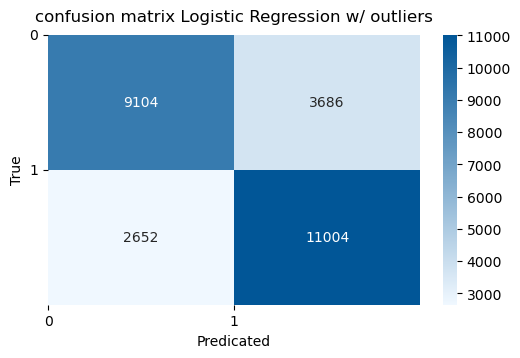

In [26]:
LogisticRegression(random_state=0, C=3888.155180308085, solver='liblinear')
clf.fit(X_train_w, y_train_w)

y_pred_w = clf.predict(X_test_w)
cf = confusion_matrix(y_test_w, y_pred_w)

plt.figure(figsize=(6, 3.5))
sns.heatmap(cf, annot=True, cmap=cmap_wb, fmt='.0f')

plt.xlabel("Predicated")
plt.ylabel("True")
plt.title("confusion matrix Logistic Regression w/ outliers", pad=10)

plt.xticks(range(len(clf.classes_)), clf.classes_, rotation = 0)
plt.yticks(range(len(clf.classes_)), clf.classes_, rotation = 360)

plt.show()

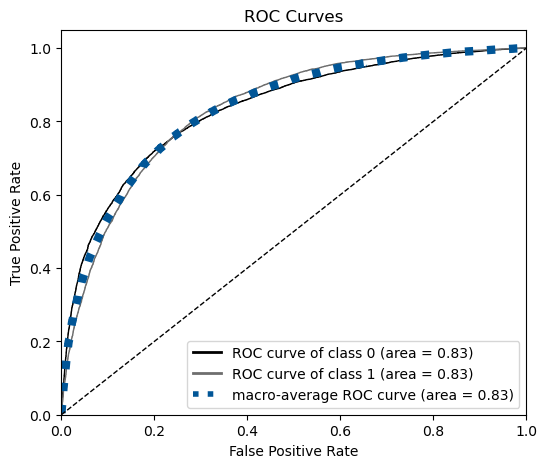

In [39]:
y_test_pred_proba = clf.predict_proba(X_test_w)
plot_roc_cust(y_test_w, y_test_pred_proba)

## SVM

In [42]:
from sklearn.svm import SVC

### w/o outliers

In [89]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

LinearSVC(random_state=42)

Accuracy 0.7519575264504793
F1-score [0.72730327 0.77252347]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     12527
           1       0.74      0.81      0.77     13654

    accuracy                           0.75     26181
   macro avg       0.75      0.75      0.75     26181
weighted avg       0.75      0.75      0.75     26181



In [100]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

SVC(gamma='auto')

Accuracy 0.8157060463695046
F1-score [0.79873191 0.8300398 ]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     12527
           1       0.80      0.86      0.83     13654

    accuracy                           0.82     26181
   macro avg       0.82      0.81      0.81     26181
weighted avg       0.82      0.82      0.82     26181



In [55]:
np.logspace(-3, 2, 6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [69]:
np.logspace(-5, 15, num=11, base=2)

array([3.1250e-02, 1.2500e-01, 5.0000e-01, 2.0000e+00, 8.0000e+00,
       3.2000e+01, 1.2800e+02, 5.1200e+02, 2.0480e+03, 8.1920e+03,
       3.2768e+04])

In [56]:
X_train_s

array([[-0.6165749 ,  1.58951139, -0.83215829, ..., -0.22517284,
        -0.29607669, -0.16917119],
       [-0.04415788, -0.78542559, -0.34908091, ..., -0.53377486,
        -0.29978278,  1.19819573],
       [ 0.43285629, -0.78542559, -0.24173039, ...,  1.03728997,
        -0.13351529, -0.44264458],
       ...,
       [-0.42576923, -0.78542559, -0.34908091, ..., -0.4776654 ,
        -0.29673902, -0.44264458],
       [ 0.24205062, -0.78542559,  0.18767173, ...,  0.47619539,
        -0.17042259,  0.10430219],
       [-0.33036639,  0.4020429 ,  1.74425439, ...,  0.75674268,
        -0.24608072, -0.98959135]])

In [72]:
np.logspace(-2,2,10)

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [75]:
%%time

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': np.logspace(-3,2,20),        # Regularization parameter
    'gamma': ['auto', 'scale', np.logspace(-3, 3, 20)], # Kernel coefficient
    'kernel': ['rbf'] #, ‘rbf’, ‘sigmoid’
}

random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_s, y_train_s)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=200. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
841 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shtk/opt/anaconda

Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1.438449888287663}
CPU times: user 6.58 s, sys: 1.97 s, total: 8.55 s
Wall time: 6min 50s


In [43]:
%%time
clf = SVC(gamma='auto', C=1.438449888287663)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8174248500821206
F1-score [0.80063397 0.83160713]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     12527
           1       0.80      0.86      0.83     13654

    accuracy                           0.82     26181
   macro avg       0.82      0.82      0.82     26181
weighted avg       0.82      0.82      0.82     26181

CPU times: user 4min 25s, sys: 4.37 s, total: 4min 29s
Wall time: 4min 33s


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


In [ ]:
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3.5))
sns.heatmap(cf, annot=True, cmap=cmap_wb, fmt='.0f')

plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("confusion matrix SVC", pad=10)

plt.xticks(range(len(clf.classes_)), clf.classes_, rotation = 0)
plt.yticks(range(len(clf.classes_)), clf.classes_, rotation = 360)

plt.show()

### w/ outliers

In [ ]:
clf = SVC(gamma='auto', C=1.438449888287663, probability=True)
clf.fit(X_train_w, y_train_w)

y_pred_w = clf.predict(X_test_w)

print('Accuracy %s' % accuracy_score(y_test_w, y_pred_w))
print('F1-score %s' % f1_score(y_test_w, y_pred_w, average=None))
print(classification_report(y_test_w, y_pred_w))

cf = confusion_matrix(y_test_w, y_pred_w)

plt.figure(figsize=(6, 3.5))
sns.heatmap(cf, annot=True, cmap=cmap_wb, fmt='.0f')

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("confusion matrix SVC")

plt.xticks(range(len(clf.classes_)), clf.classes_, rotation = 0)
plt.yticks(range(len(clf.classes_)), clf.classes_, rotation = 360)

plt.show()

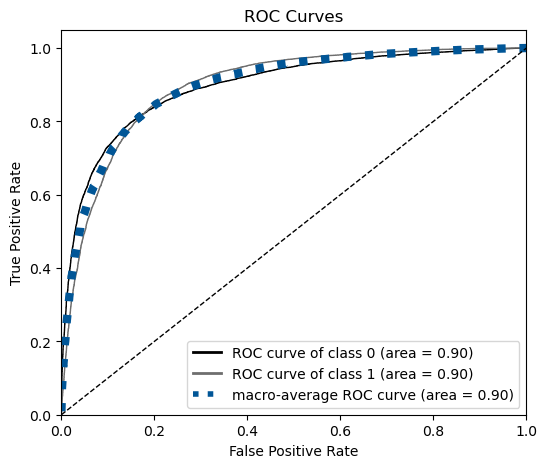

In [98]:
y_test_pred_proba_w = clf.predict_proba(X_test_w)
plot_roc_cust(y_test_w, y_test_pred_proba_w)

## Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [43]:
%%time
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train, y_train)

CPU times: user 21.2 s, sys: 206 ms, total: 21.4 s
Wall time: 2.99 s


RandomForestClassifier(n_jobs=-1, random_state=0)

In [44]:
eval(clf, X_test, y_train, y_test)

Accuracy: 0.851495359229976
Train Accuracy 0.999787195730819
Train F1-score [0.9997775  0.99979608]

Test Accuracy 0.851495359229976
Test F1-score [0.84169381 0.86015395]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     12527
           1       0.85      0.88      0.86     13654

    accuracy                           0.85     26181
   macro avg       0.85      0.85      0.85     26181
weighted avg       0.85      0.85      0.85     26181



In [22]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
%%time


param_grid = {
    'max_depth': [10, 20, 40, 60, 100],
    'min_samples_split': [2, 5, 10,  30, 50, 100],
    'min_samples_leaf': [2, 5, 10,  30, 50, 100],
    'criterion': ['gini', 'entropy']}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Best parameters: {'min_samples_split': 100, 'min_samples_leaf': 30, 'max_depth': 100, 'criterion': 'entropy'}
CPU times: user 4.45 s, sys: 1.86 s, total: 6.31 s
Wall time: 2min 40s


In [25]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=100, 
                             min_samples_split=100, 
                             min_samples_leaf=30, 
                             min_weight_fraction_leaf=0.0, 
                             random_state=0)
clf.fit(X_train, y_train)
eval(clf, X_test, y_train, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=30,
                       min_samples_split=100, random_state=0)

Accuracy: 0.8179595890149345
Train Accuracy 0.8496783381623533
Train F1-score [0.84197484 0.85666568]

Test Accuracy 0.8179595890149345
Test F1-score [0.80905449 0.82607109]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12527
           1       0.82      0.83      0.83     13654

    accuracy                           0.82     26181
   macro avg       0.82      0.82      0.82     26181
weighted avg       0.82      0.82      0.82     26181



In [32]:
%%time
# max_depth=29, min_samples_leaf=40, min_samples_split=100
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=29, 
                             min_samples_split=100, 
                             min_samples_leaf=40, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train, y_train)
eval(clf, X_test, y_train, y_test)

Accuracy: 0.8287307589473282
Train Accuracy 0.8510206420141105
Train F1-score [0.83961017 0.86091541]

Test Accuracy 0.8287307589473282
Test F1-score [0.81586728 0.83991432]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.79      0.82     12527
           1       0.82      0.86      0.84     13654

    accuracy                           0.83     26181
   macro avg       0.83      0.83      0.83     26181
weighted avg       0.83      0.83      0.83     26181

CPU times: user 15.2 s, sys: 136 ms, total: 15.3 s
Wall time: 2.26 s


In [42]:
%time
train_acc = []
test_acc = []
for n in [2**i for i in range(1, 10)]:
    clf = RandomForestClassifier(n_estimators=n, 
                             criterion='gini', 
                             max_depth=29, 
                             min_samples_split=100, 
                             min_samples_leaf=40, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc += [accuracy_score(y_train, y_train_pred)]
    test_acc += [accuracy_score(y_test, y_test_pred)]

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 31 µs


RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=2, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=4, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=8, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=16, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=32, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=64, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=128, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=256, n_jobs=-1, random_state=0)

RandomForestClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=512, n_jobs=-1, random_state=0)

In [43]:
train_acc

[0.8325557792728642,
 0.8428031233118892,
 0.8452421876278872,
 0.8480577518047439,
 0.8511679680466205,
 0.8511515984874527,
 0.8512498158424594,
 0.851348033197466,
 0.8512498158424594]

In [44]:
test_acc

[0.8113517436308774,
 0.8204805011267713,
 0.8223138917535617,
 0.8265154119399565,
 0.8288835414995608,
 0.8284633894809212,
 0.828959932775677,
 0.8283106069286887,
 0.8284251938428632]

In [40]:
[2**i for i in range(1, 10)]

[2, 4, 8, 16, 32, 64, 128, 256, 512]

<Figure size 1000x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fea1c8ea760>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '8'),
  Text(3, 0, '16'),
  Text(4, 0, '32'),
  Text(5, 0, '64'),
  Text(6, 0, '128'),
  Text(7, 0, '256'),
  Text(8, 0, '512')])

Text(0.5, 0, 'number of trees')

Text(0, 0.5, 'score')

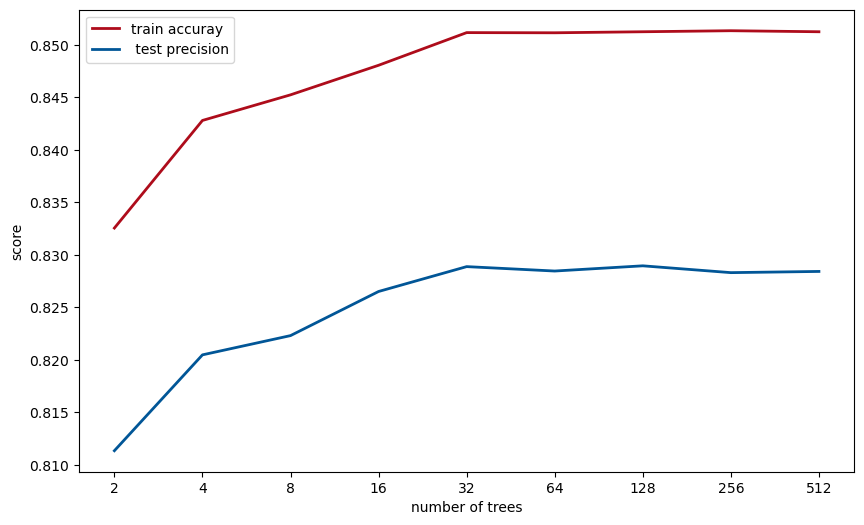

In [46]:
# Plot the precision, recall, and F1 scores for each value of k
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='train accuray',  c=colors[0], lw=2)

plt.plot(test_acc, label=' test precision', c=colors[1], lw=2)

plt.xticks(range(len([2**i for i in range(1, 10)])), [2**i for i in range(1, 10)])
#plt.title('Classification Performance for Different Values of k')
plt.xlabel('number of trees')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [128],
    'max_depth': [10, 20, 40, 60, 100],
    'min_samples_split': [2, 5, 10,  30],
    'min_samples_leaf': [2, 5, 10,  30],
    "max_features": ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

In [29]:
%%time


param_grid = {
    'n_estimators': [32],
    'max_depth': [10, 20, 40, 60, 100, 200],
    'min_samples_split': [20,  30, 50, 100, 200],
    'min_samples_leaf': [20,  30, 50, 100, 200],
    "max_features": ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_s, y_train_s)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 32, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 200, 'criterion': 'entropy'}
CPU times: user 2.65 s, sys: 684 ms, total: 3.33 s
Wall time: 59.8 s


In [53]:
list(np.arange(5, 100, 5))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [ ]:
%%time


param_grid = {
    'n_estimators': [32],
    'max_depth': [50, 100, 150, 200, 250],
    'min_samples_split': [20, 30, 40, 50],
    'min_samples_leaf': [20, 30, 40, 50],
    "max_features": ['sqrt', 'log2', None],
    'criterion': ['entropy', 'gini']
    
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

In [ ]:
#{'n_estimators': 32, 'min_samples_split': 30, 
#'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 200, 'criterion': 'entropy'}

In [35]:
clf

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32)

In [87]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32,
                             random_state=0, 
                             n_jobs=-1)
rfc.fit(X_train, y_train)
eval(rfc, X_test, y_train, y_test)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32, n_jobs=-1,
                       random_state=0)

Accuracy: 0.8364844734731294
Train Accuracy 0.8761970240141433
Train F1-score [0.86699611 0.8842073 ]

Test Accuracy 0.8364844734731294
Test F1-score [0.82462824 0.84683911]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12527
           1       0.83      0.87      0.85     13654

    accuracy                           0.84     26181
   macro avg       0.84      0.84      0.84     26181
weighted avg       0.84      0.84      0.84     26181



In [72]:
clf

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=2, n_estimators=128)

In [41]:
clf = RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=2, n_estimators=128,
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_leaf=2, n_estimators=128, n_jobs=-1,
                       random_state=0)

In [42]:
eval(clf, X_test, y_train, y_test)

Accuracy: 0.8501203162598832
Train Accuracy 0.9973972400923243
Train F1-score [0.99727744 0.99750694]

Test Accuracy 0.8501203162598832
Test F1-score [0.8395092  0.85941531]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     12527
           1       0.84      0.88      0.86     13654

    accuracy                           0.85     26181
   macro avg       0.85      0.85      0.85     26181
weighted avg       0.85      0.85      0.85     26181



Accuracy 0.8501203162598832
F1-score [0.8395092  0.85941531]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     12527
           1       0.84      0.88      0.86     13654

    accuracy                           0.85     26181
   macro avg       0.85      0.85      0.85     26181
weighted avg       0.85      0.85      0.85     26181



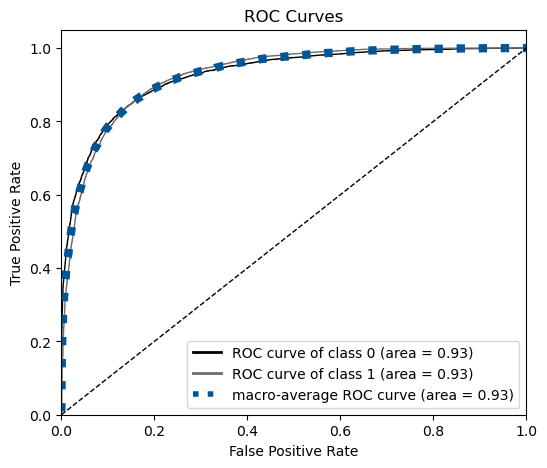

In [87]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_test_pred_proba = clf.predict_proba(X_test)
plot_roc_cust(y_test, y_test_pred_proba)

Accuracy 0.8364844734731294
F1-score [0.82462824 0.84683911]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12527
           1       0.83      0.87      0.85     13654

    accuracy                           0.84     26181
   macro avg       0.84      0.84      0.84     26181
weighted avg       0.84      0.84      0.84     26181



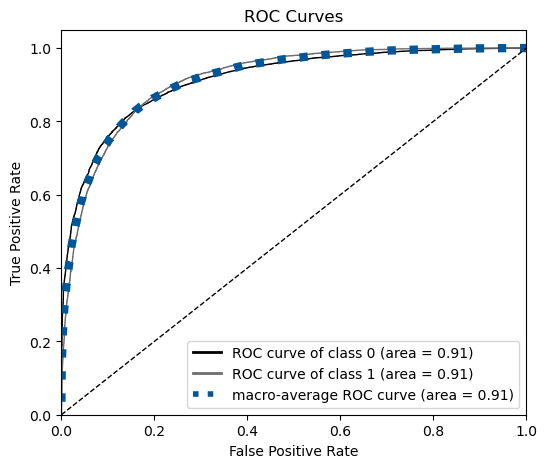

In [38]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_test_pred_proba = clf.predict_proba(X_test)
plot_roc_cust(y_test, y_test_pred_proba)

<Figure size 600x350 with 0 Axes>

<AxesSubplot:>

Text(0.5, 9.222222222222216, 'Predicated')

Text(45.722222222222214, 0.5, 'True')

Text(0.5, 1.0, 'confusion matrix Random Forest')

([<matplotlib.axis.XTick at 0x7f8c0a972550>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

([<matplotlib.axis.YTick at 0x7f8c0a9864c0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

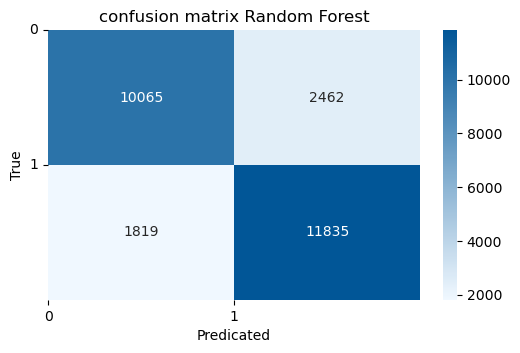

In [39]:
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3.5))
sns.heatmap(cf, annot=True, cmap=cmap_wb, fmt='.0f')

plt.xlabel("Predicated")
plt.ylabel("True")
plt.title("confusion matrix Random Forest")

plt.xticks(range(len(clf.classes_)), clf.classes_, rotation = 0)
plt.yticks(range(len(clf.classes_)), clf.classes_, rotation = 360)

plt.show()

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7ff0d9adc5b0>,
 [Text(0, 0, 'duration_min'),
  Text(0, 1, 'energy'),
  Text(0, 2, 'acousticness'),
  Text(0, 3, 'album_type'),
  Text(0, 4, 'track_number'),
  Text(0, 5, 'genre'),
  Text(0, 6, 'album_release_year'),
  Text(0, 7, 'album_total_tracks'),
  Text(0, 8, 'followers'),
  Text(0, 9, 'popularity_art')])

Text(0.5, 1.0, 'Random Forest Feature Importances')

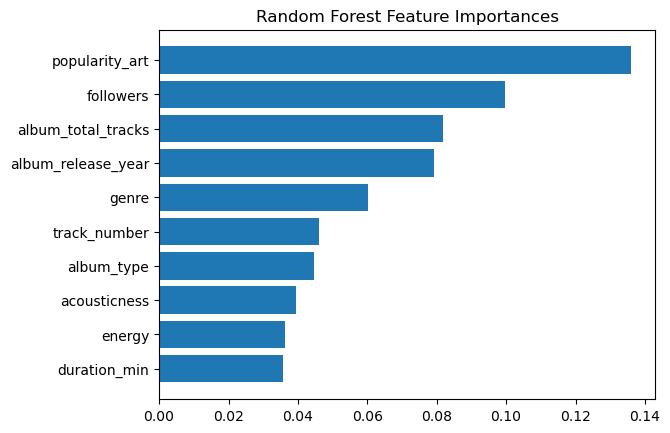

In [101]:
nbr_features = 10

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

## SVR

In [21]:
from sklearn.svm import SVR

In [41]:
%%time
svr = SVR() 
  
# train the model on the data 
svr.fit(X_train_reg_s, y_train_reg_s) 
  
# make predictions on the data 


CPU times: user 2.91 s, sys: 50.5 ms, total: 2.96 s
Wall time: 3.06 s


In [74]:
y_pred = svr.predict(X_test_reg_s) 

In [72]:
y_pred

array([53.39907637, 62.28045979, 26.80613865, ..., 38.64176144,
       41.1147443 , 50.82050017])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print('R2: %.3f' % r2_score(y_test_reg_s, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_reg_s, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_reg_s, y_pred))

R2: 0.442
MSE: 263.935
MAE: 12.902


In [91]:
%%time

from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': np.logspace(-3,3,6),        # Regularization parameter
    'gamma': ['auto', 'scale', np.logspace(-3, 3, 6)], # Kernel coefficient
    'epsilon': [0.01, 0.1, 0.5, 1, 2]
}

random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_reg_s, y_train_reg_s)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
335 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
231 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  F

Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 2, 'C': 3.981071705534969}
CPU times: user 7.52 s, sys: 2.81 s, total: 10.3 s
Wall time: 22min 47s


In [44]:
np.logspace(-3,3,6)

array([1.00000000e-03, 1.58489319e-02, 2.51188643e-01, 3.98107171e+00,
       6.30957344e+01, 1.00000000e+03])

In [94]:
%%time

from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': np.logspace(-3,2,20),        # Regularization parameter
    'gamma': ['scale'], # Kernel coefficient
    'epsilon': [ 1, 1.5, 2, 3, 10, 100]
}

random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_reg_s, y_train_reg_s)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 120 is smaller than n_iter=200. Running 120 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 3, 'C': 16.23776739188721}
CPU times: user 2.67 s, sys: 649 ms, total: 3.31 s
Wall time: 1min 40s


In [95]:
%%time
svr = SVR(kernal='rbf', gamma='scale', epsilon=3, C=16.23776739188721) 
  
# train the model on the data 
svr.fit(X_train_reg, y_train_reg) 
  
# make predictions on the data 
y_pred = svr.predict(X_test_reg)


print('R2: %.3f' % r2_score(y_test_reg, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred))

R2: 0.553
MSE: 204.957
MAE: 10.768
CPU times: user 6min 41s, sys: 4.64 s, total: 6min 46s
Wall time: 6min 50s


In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)

print('R2: %.3f' % r2_score(y_test_reg, y_pred_lr))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_lr))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_lr))

LinearRegression()

R2: 0.346
MSE: 300.147
MAE: 13.702


In [124]:
reg = Ridge(alpha=100)
reg.fit(X_train_reg, y_train_reg)

y_pred_1 = reg.predict(X_test_reg)
print('R2: %.3f' % r2_score(y_test_reg, y_pred_1))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_1))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_1))

Ridge(alpha=100)

R2: 0.346
MSE: 300.143
MAE: 13.704


In [123]:
param_grid = {'alpha': [10, 50, 100, 150, 200]}

# Use GridSearchCV to find the best parameter
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_reg, y_train_reg)

# Get the best parameter
best_alpha = grid_search.best_params_
print(f'Best alpha: {best_alpha}')

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [10, 50, 100, 150, 200]})

Best alpha: {'alpha': 100}


In [118]:
reg = Lasso(alpha=0.01)
reg.fit(X_train_reg, y_train_reg)

y_pred_1 = reg.predict(X_test_reg)
print('R2: %.3f' % r2_score(y_test_reg, y_pred_1))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_1))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_1))

Lasso(alpha=0.01)

R2: 0.346
MSE: 300.115
MAE: 13.703


## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
%%time
rf = RandomForestRegressor()

rf.fit(X_train_reg, y_train_reg)

y_pred_rf = reg.predict(X_test_reg)
print('R2: %.3f' % r2_score(y_test_reg, y_pred_rf))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_rf))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_rf))

R2: 0.346
MSE: 300.143
MAE: 13.704
CPU times: user 1min 23s, sys: 774 ms, total: 1min 24s
Wall time: 1min 25s


In [132]:
train_acc

[61.7131000759542,
 40.10242889074285,
 28.23740303670725,
 22.68031412575568,
 19.92917897625798,
 18.65653302496917,
 17.89177357379941,
 17.661127160150798,
 17.47095555123412]

In [136]:
r2

[0.8656872220691361,
 0.9128954244343229,
 0.9383681469282763,
 0.9502606797338262,
 0.9563169819168594,
 0.9595243111489764,
 0.960895762303351,
 0.9616739824497819,
 0.9619520927053957]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 20.3 µs


RandomForestRegressor(n_estimators=2)

RandomForestRegressor(n_estimators=4)

RandomForestRegressor(n_estimators=8)

RandomForestRegressor(n_estimators=16)

RandomForestRegressor(n_estimators=32)

RandomForestRegressor(n_estimators=64)

RandomForestRegressor(n_estimators=128)

RandomForestRegressor(n_estimators=256)

RandomForestRegressor(n_estimators=512)

<Figure size 1000x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x7ff0ed7109a0>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '8'),
  Text(3, 0, '16'),
  Text(4, 0, '32'),
  Text(5, 0, '64'),
  Text(6, 0, '128'),
  Text(7, 0, '256'),
  Text(8, 0, '512')])

Text(0.5, 0, 'number of trees')

Text(0, 0.5, 'score')

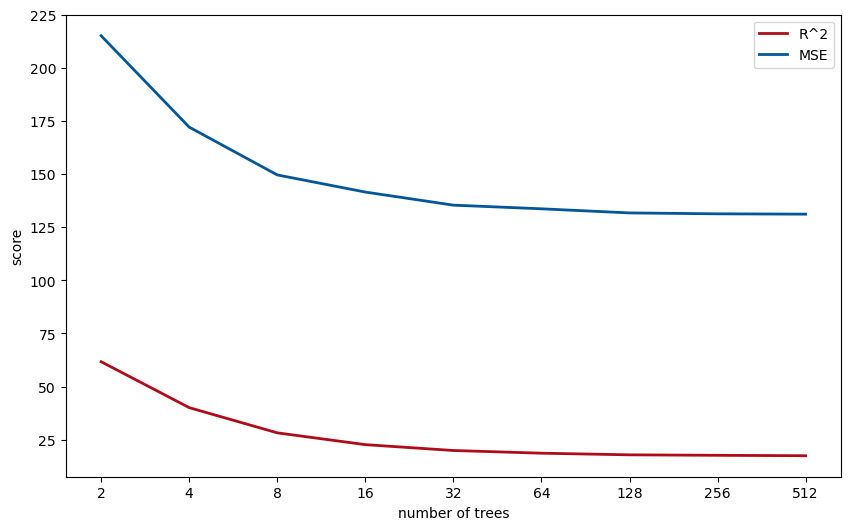

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 13.1 µs


<Figure size 1000x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fc7004b4c70>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '8'),
  Text(3, 0, '16'),
  Text(4, 0, '32'),
  Text(5, 0, '64'),
  Text(6, 0, '128'),
  Text(7, 0, '256'),
  Text(8, 0, '512')])

Text(0.5, 0, 'number of trees')

Text(0, 0.5, 'score')

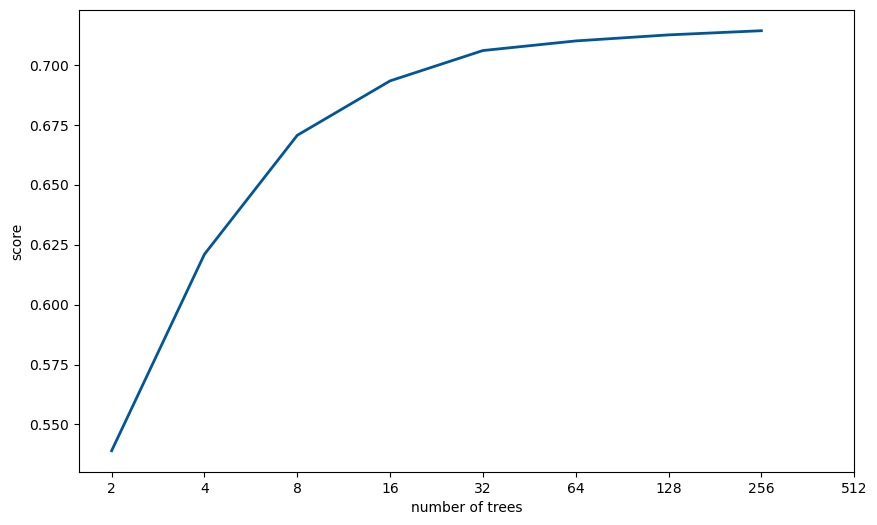

In [33]:
%time
r2 = []
for n in [2**i for i in range(1, 9)]:
    clf = RandomForestRegressor(n_estimators=n)
    clf.fit(X_train_reg, y_train_reg)
    Y_train_pred = clf.predict(X_train_reg)
    y_test_pred = clf.predict(X_test_reg)
    r2 += [r2_score(y_test_reg, y_test_pred)]
  #  mse += [mean_squared_error(y_test_reg, y_test_pred)]

# Plot the precision, recall, and F1 scores for each value of k
plt.figure(figsize=(10, 6))
plt.plot(r2, label='R^2',  c=colors[1], lw=2)



plt.xticks(range(len([2**i for i in range(1, 10)])), [2**i for i in range(1, 10)])
#plt.title('Classification Performance for Different Values of k')
plt.xlabel('number of trees')
plt.ylabel('score')
plt.legend()
plt.show()

In [35]:
%%time


param_grid = {
    'n_estimators': [64],
    'max_depth': [10, 20, 40, 60, 100],
    'min_samples_split': [2, 5, 10,  30],
    'min_samples_leaf': [2, 5, 10,  30],
    "max_features": ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
    #{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
    
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_reg_s, y_train_reg_s)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 64, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 100, 'criterion': 'friedman_mse'}
CPU times: user 7.01 s, sys: 1.73 s, total: 8.74 s
Wall time: 17min 18s


In [36]:
%%time

param_grid = {
    'n_estimators': [64],
    'max_depth': [60, 100, 150, 200],
    'min_samples_split': [5, 10,  30],
    'min_samples_leaf': [1, 2, 5, 10],
    "max_features": ['sqrt', 'log2', None],
    'criterion': ['friedman_mse']
    #{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
    
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    refit=True,
    n_iter=200,
    random_state=42
)

random_search.fit(X_train_reg, y_train_reg)
clf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 144 is smaller than n_iter=200. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 64, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 200, 'criterion': 'friedman_mse'}
CPU times: user 59 s, sys: 4.83 s, total: 1min 3s
Wall time: 47min 19s


In [37]:
clf

RandomForestRegressor(criterion='friedman_mse', max_depth=200,
                      max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=64)

In [ ]:
rf = RandomForestRegressor(criterion='friedman_mse', max_depth=200,
                      max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=64)

rf.fit(X_train_reg, y_train_reg)

y_pred_rf = rf.predict(X_test_reg)
print('R2: %.3f' % r2_score(y_test_reg, y_pred_rf))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_rf))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_rf))

In [48]:
y_pred_rf = rf.predict(X_test_reg)
print('R2: %.3f' % r2_score(y_test_reg, y_pred_rf))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_rf))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_rf))

R2: 0.709
MSE: 133.444
MAE: 8.100


## XAI

In [76]:
!pip install lime

  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c3fbb5f5c1e3292510981d5945475325396b0f61d545e197d304aef83f87ad6a
  Stored in directory: /Users/shtk/Library/Caches/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [22]:
from lime.lime_tabular import LimeTabularExplainer

26181

In [112]:
xtr, xt, ytr,yt = train_test_split(x,y,test_size=0.3,random_state=2)

In [113]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32,
                             random_state=0, 
                             n_jobs=-1)
rfc.fit(xtr, ytr)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32, n_jobs=-1,
                       random_state=0)

In [117]:
rfc.predict

<bound method ForestClassifier.predict of RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32, n_jobs=-1,
                       random_state=0)>

In [118]:
ypred=rfc.predict(xt)

In [115]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [119]:
print(classification_report(yt, ypred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     12527
           1       0.83      0.87      0.85     13654

    accuracy                           0.84     26181
   macro avg       0.84      0.83      0.83     26181
weighted avg       0.84      0.84      0.83     26181



In [122]:
%%time
# creating an instance of the lime tabular explainer
lime_explainer = LimeTabularExplainer(training_data=x.values, feature_names=x.columns, 
            class_names=["not_popular", "popular"], mode='classification')

CPU times: user 351 ms, sys: 30.7 ms, total: 382 ms
Wall time: 387 ms


In [85]:
X_test_s[0]

array([ 0.77702768, -0.79233341, -0.02652741, -1.14132227, -2.3551976 ,
       -3.70500304, -0.41972936,  1.98775488,  2.32764808, -0.67711704,
       -1.29522278, -1.02209145, -1.0557305 , -0.39904222, -0.35273905,
       -0.31600872, -0.50640135, -0.7268457 , -0.36851305, -1.49381102,
       -0.29403242,  0.11858773])

In [89]:
rfc.predict_proba

<bound method ForestClassifier.predict_proba of RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=32, n_jobs=-1,
                       random_state=0)>

In [90]:
len(x.columns)

23

In [29]:
rfc.predict_proba(X_test)[0]

array([0.78638643, 0.21361357])

In [37]:
explanation = lime_explainer.explain_instance(data_row=X_test[0], 
                                              predict_fn=rfc.predict_proba, num_features=len(x.columns))

In [93]:
explanation.local_exp

{1: [(19, -0.21686120714677434),
  (14, 0.07920816914923247),
  (17, 0.0643691636888705),
  (20, -0.05335369282401163),
  (0, -0.045539148693532525),
  (1, 0.03324596371545306),
  (21, -0.03119319148824221),
  (15, -0.02245125639502691),
  (5, -0.017046630276566332),
  (16, 0.016503924389010785),
  (2, 0.015995303701483526),
  (4, 0.010551072655051796),
  (3, -0.010497711327051391),
  (10, 0.007443993469003024),
  (9, -0.005825189766006758),
  (18, 0.005152930390969722),
  (13, -0.0049235545798900935),
  (8, -0.004468230999780435),
  (7, 0.003739780385685928),
  (11, 0.0029900867413333618),
  (6, 0.0026276153282864517),
  (12, 0.0013936165453329096)]}

In [123]:
prob = pd.DataFrame(rfc.predict_proba(xt))

In [139]:
prob

0         1
0      0.498620  0.501380
1      0.818921  0.181079
2      0.274384  0.725616
3      0.137677  0.862323
4      0.175378  0.824622
...         ...       ...
26176  0.876216  0.123784
26177  0.484351  0.515649
26178  0.853116  0.146884
26179  0.905167  0.094833
26180  0.054263  0.945737

[26181 rows x 2 columns]

In [124]:
prob[(prob[0]>0.5) & (prob[0]<0.51)].sort_values(by=0)

0         1
23411  0.500055  0.499945
8391   0.500075  0.499925
3579   0.500162  0.499838
25780  0.500263  0.499737
991    0.500290  0.499710
...         ...       ...
9813   0.509771  0.490229
23211  0.509813  0.490187
19661  0.509819  0.490181
8255   0.509848  0.490152
16359  0.509908  0.490092

[203 rows x 2 columns]

In [70]:
y_test

45974    0
19115    0
10141    1
3440     1
38308    1
        ..
17934    0
64567    0
36753    0
69802    0
70505    1
Name: popularity_track, Length: 26181, dtype: int64

In [73]:
prob['true'] = y_test

In [131]:
prob[prob[0]==0]

0    1
4427  0.0  1.0

In [78]:
y_pred = rfc.predict(X_test)

In [79]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [82]:
y_test.iloc[19041]

1

In [125]:
prob[((prob[0]>0.5) & (prob[0]<0.51)) | ((prob[1]>0.5) & (prob[1]<0.51))]

0         1
0      0.498620  0.501380
43     0.509590  0.490410
139    0.507097  0.492903
198    0.497169  0.502831
220    0.494318  0.505682
...         ...       ...
25786  0.498859  0.501141
25825  0.508531  0.491469
25826  0.505727  0.494273
25838  0.506195  0.493805
25968  0.496231  0.503769

[389 rows x 2 columns]

In [147]:
c = 0
for i in prob[prob[0]==0].index:
    if yt.iloc[i] == 0:
        print(i)
        c+1

In [145]:
c

183

In [130]:
prob[prob[0]==1].count()

0    39
1    39
dtype: int64

In [72]:
len(y_test)

26181

In [133]:
prob[prob[1]==0]

0    1
29     1.0  0.0
260    1.0  0.0
724    1.0  0.0
985    1.0  0.0
1220   1.0  0.0
1449   1.0  0.0
1837   1.0  0.0
2974   1.0  0.0
4954   1.0  0.0
5674   1.0  0.0
8121   1.0  0.0
9423   1.0  0.0
9479   1.0  0.0
10092  1.0  0.0
10791  1.0  0.0
11070  1.0  0.0
12166  1.0  0.0
12693  1.0  0.0
12841  1.0  0.0
15508  1.0  0.0
16076  1.0  0.0
17421  1.0  0.0
17455  1.0  0.0
17523  1.0  0.0
18727  1.0  0.0
18762  1.0  0.0
18994  1.0  0.0
21117  1.0  0.0
21176  1.0  0.0
21272  1.0  0.0
21842  1.0  0.0
22001  1.0  0.0
22352  1.0  0.0
22673  1.0  0.0
23160  1.0  0.0
23847  1.0  0.0
24519  1.0  0.0
25670  1.0  0.0
25858  1.0  0.0

In [ ]:
explanation = lime_explainer.explain_instance(data_row=X_test[12496], 
                                              predict_fn=rfc.predict_proba, num_features=len(x.columns))

In [48]:
rfc.predict_proba(X_test)[12496]

array([0.50002601, 0.49997399])

In [52]:
x.columns == 'album_release_year'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False])

In [53]:
X_test[12496][-6]

1.2048848942804602

In [141]:
# 100% 0 3249
explanation = lime_explainer.explain_instance(data_row=xt.iloc[29], 
                                              predict_fn=rfc.predict_proba, num_features=10)

explanation.show_in_notebook()

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [142]:
# 100% 1 4427
explanation = lime_explainer.explain_instance(data_row=xt.iloc[4427], 
                                              predict_fn=rfc.predict_proba, num_features=10)

explanation.show_in_notebook()

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
x = scl.inverse_transform(X_test)

In [105]:
X_test[43]

array([ 0.86227125,  0.36036448, -0.01983364, -0.60227059, -0.80125765,
        0.0736167 , -0.42768437,  1.55023115, -0.52695796, -0.17923365,
        0.67229253, -0.72882104, -1.08634747, -0.73103074, -0.35748501,
        1.03025069, -0.84173457,  0.25794246, -0.44785272, -0.35376943,
       -0.28295659, -0.40712804,  0.95722368])

In [143]:
# =50%
explanation = lime_explainer.explain_instance(data_row=xt.iloc[43], 
                                              predict_fn=rfc.predict_proba, num_features=10)

explanation.show_in_notebook()

/Users/shtk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [106]:
# 100% 1 19041
explanation = lime_explainer.explain_instance(data_row=X_test[19041], 
                                              predict_fn=rfc.predict_proba, num_features=10)

explanation.show_in_notebook()

KeyError: 22

In [95]:
!pip install shap